In [1]:
#!pip install opencv-python
#!pip install tensorflow
#!pip install keras

import numpy as np
import tensorflow as tf
import builtins
import os
import pickle
import time
import pylab
import cv2
import keras
import sys
import random

from matplotlib import gridspec
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, fixed
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras import backend as K
from keras.utils import np_utils

%matplotlib inline
random.seed(0)

Using TensorFlow backend.


In [2]:
dim = (640, 640)
step = 32
count = 400
num_classes = 10
classes = 4

# 0 - принадлежность
# 1 - пересечение
# 2 - объединение
# 3 - пустое множество

In [3]:
y_train = np.ndarray((2 * count,))
y_test = np.ndarray((count,))

for i in range(count):
    if i < 100:
        y_train[i] = 0
        y_test[i] = 0
    elif i < 200:
        y_train[i] = 1
        y_test[i] = 1
    elif i < 300:
        y_train[i] = 2
        y_test[i] = 2
    elif i < 400:
        y_train[i] = 3
        y_test[i] = 3

k = 400
for i in range(20):
    for j in range(20):
        if (i < 10) & (j < 10):
            y_train[k] = 3
        elif (i < 10) & (j >= 10):
            y_train[k] = 0
        elif (i >= 10) & (j < 10):
            y_train[k] = 1
        elif (i >= 10) & (j >= 10):
            y_train[k] = 2
        k += 1           

# Ann

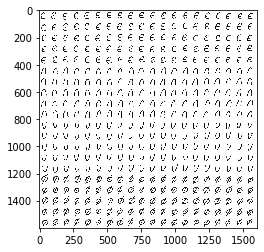

In [4]:
Ann_image = cv2.imread("test.jpg")
plt.imshow(Ann_image)

In [5]:
Ann_image.shape

(1600, 1600, 3)

In [6]:
resized_Ann_image = cv2.resize(Ann_image, dim, interpolation = cv2.INTER_AREA)

0.0


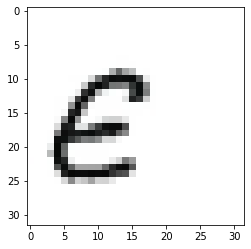

In [7]:
list_Ann_im = []

for i in range(0, resized_Ann_image.shape[0], step):
    for j in range(0, resized_Ann_image.shape[0], step):
        list_Ann_im.append(resized_Ann_image[i:i + step, j:j + step])

plt.imshow(list_Ann_im[99])
print(y_train[99])

1.0


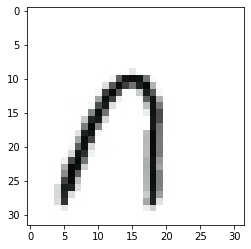

In [8]:
plt.imshow(list_Ann_im[130])
print(y_train[130])

2.0


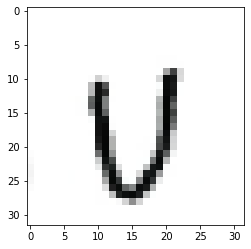

In [9]:
plt.imshow(list_Ann_im[200])
print(y_train[200])

3.0


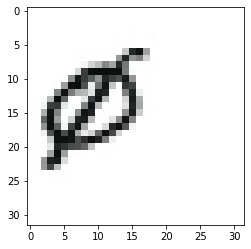

In [10]:
plt.imshow(list_Ann_im[399])
print(y_train[399])

# Vi

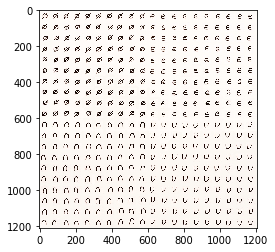

In [11]:
Violetta_image = cv2.imread("train_2.jpg")
plt.imshow(Violetta_image)

In [12]:
Violetta_image.shape

(1208, 1210, 3)

In [13]:
resized_Violetta_image = cv2.resize(Violetta_image, dim, interpolation = cv2.INTER_AREA)

3.0


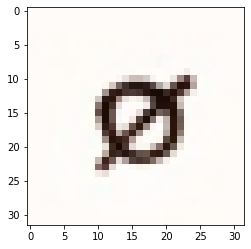

In [14]:
list_Violetta_im = []
for i in range(0, resized_Violetta_image.shape[0], step):
    for j in range(0, resized_Violetta_image.shape[0], step):
        list_Violetta_im.append(resized_Violetta_image[i:i + step, j:j + step])
        
plt.imshow(list_Violetta_im[46])
print(y_train[446])

0.0


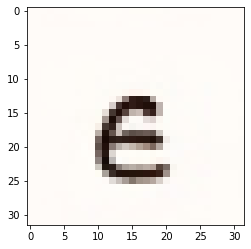

In [15]:
plt.imshow(list_Violetta_im[130])
print(y_train[530])

1.0


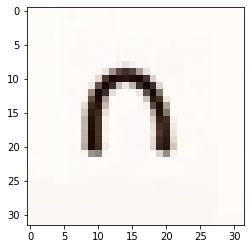

In [16]:
plt.imshow(list_Violetta_im[221])
print(y_train[621])

2.0


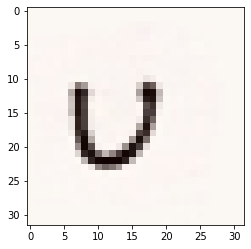

In [17]:
plt.imshow(list_Violetta_im[399])
print(y_train[799])

# Lesha

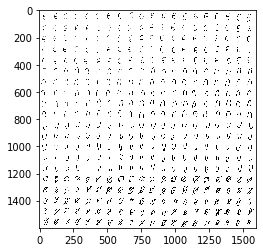

In [18]:
Lesha_image = cv2.imread("train_1.jpg")
plt.imshow(Lesha_image)

In [19]:
Lesha_image.shape

(1600, 1592, 3)

In [20]:
resized_Lesha_image = cv2.resize(Lesha_image, dim, interpolation = cv2.INTER_AREA)

0.0


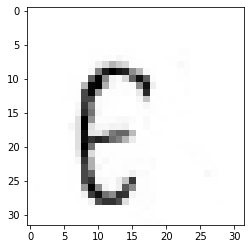

In [21]:
list_Lesha_im = []
for i in range(0, resized_Lesha_image.shape[0], step):
    for j in range(0, resized_Lesha_image.shape[0], step):
        list_Lesha_im.append(resized_Lesha_image[i:i + step, j:j + step])

plt.imshow(list_Lesha_im[99])
print(y_test[99])

1.0


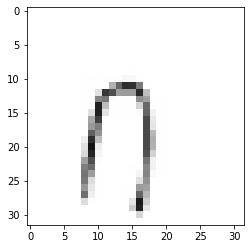

In [22]:
plt.imshow(list_Lesha_im[130])
print(y_test[130])

2.0


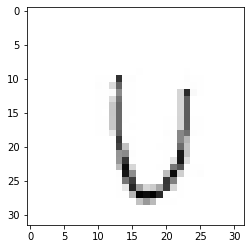

In [23]:
plt.imshow(list_Lesha_im[202])
print(y_test[202])

3.0


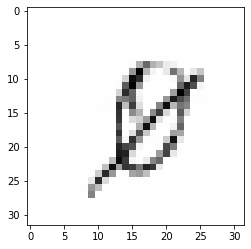

In [24]:
plt.imshow(list_Lesha_im[344])
print(y_test[344])

In [25]:
x_train = np.array(list_Lesha_im + list_Violetta_im)
x_test = np.array(list_Ann_im)

#list_Ann_im
#list_Violetta_im
#list_Lesha_im

In [26]:
x_train.shape

(800, 32, 32, 3)

In [27]:
x_train_norm = x_train.astype('float32')
x_test_norm = x_test.astype('float32')
x_train_norm /= 255
x_test_norm /= 255
print('x_train shape:', x_train_norm.shape)
print(x_train_norm.shape[0], 'train samples')
print(x_test_norm.shape[0], 'test samples')

y_train_ = keras.utils.to_categorical(y_train, classes)
y_test_ = keras.utils.to_categorical(y_test, classes)

x_train shape: (800, 32, 32, 3)
800 train samples
400 test samples


In [28]:
epochs = 18
input_shape = (32, 32, 3)
batch_size = 128

# Односвязная

In [29]:
hidden_size = 128

inp = Input(shape = (32,32,3))
flat = Flatten()(inp)
out = Dense(classes, activation='softmax')(flat)

model_ogurec = Model(inputs = inp, outputs = out) #определяем модель
model_ogurec.compile(loss = keras.losses.categorical_crossentropy,#компилируем
              optimizer = keras.optimizers.Adam(),
              metrics = ['accuracy'])

model_ogurec.summary()
hist__ = model_ogurec.fit(x_train_norm, y_train_, #трениров очка
          batch_size = batch_size,
          epochs = 25, 
          verbose = 1, validation_data = (x_test_norm, y_test_)) #показали где у нас тестовые наборы validation_data = (x_test_norm, y_test_)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 12292     
Total params: 12,292
Trainable params: 12,292
Non-trainable params: 0
_________________________________________________________________
Train on 800 samples, validate on 400 samples
Epoch 1/25
800/800 [==============================] - 0s 199us/step - loss: 2.0250 - accuracy: 0.2925 - val_loss: 1.4928 - val_accuracy: 0.2275
Epoch 2/25
800/800 [==============================] - 0s 56us/step - loss: 1.5042 - accuracy: 0.3088 - val_loss: 1.5456 - val_accuracy: 0.2525
Epoch 3/25
800/800 [==============================] 

In [30]:
score__ = model_ogurec.evaluate(x_test_norm, y_test_, verbose = 0) #пошла жара
print('Test loss:', score__[0])
print('Test accuracy:', score__[1])

Test loss: 0.5233608400821685
Test accuracy: 0.8550000190734863


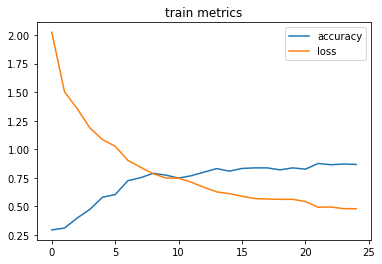

In [31]:
plt.plot(hist__.history['accuracy'])
plt.plot(hist__.history['loss'])
plt.title('train metrics')
plt.legend(['accuracy', 'loss'])

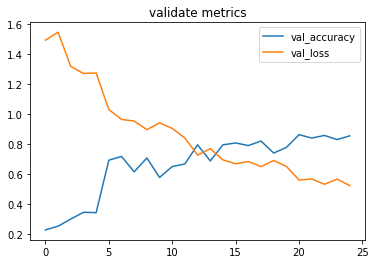

In [32]:
plt.plot(hist__.history['val_accuracy'])
plt.plot(hist__.history['val_loss'])
plt.title('validate metrics')
plt.legend(['val_accuracy', 'val_loss'])

# Полносвязная Штука

In [33]:
hidden_size = 128

inp = Input(shape = (32,32,3))
hidden_1 = Dense(32, activation='relu')(inp)
hidden_2 = Dense(32, activation='relu')(hidden_1)
flat = Flatten()(hidden_2)
out = Dense(classes, activation='softmax')(flat)

model_ogurec = Model(inputs = inp, outputs = out) #определяем модель
model_ogurec.compile(loss = keras.losses.categorical_crossentropy,#компилируем
              optimizer = keras.optimizers.Adam(),
              metrics = ['accuracy'])

model_ogurec.summary()
hist_ = model_ogurec.fit(x_train_norm, y_train_, #трениров очка
          batch_size = batch_size,
          epochs = epochs, 
          verbose = 1, validation_data = (x_test_norm, y_test_)) #показали где у нас тестовые наборы validation_data = (x_test_norm, y_test_)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
dense_2 (Dense)              (None, 32, 32, 32)        128       
_________________________________________________________________
dense_3 (Dense)              (None, 32, 32, 32)        1056      
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 131076    
Total params: 132,260
Trainable params: 132,260
Non-trainable params: 0
_________________________________________________________________
Train on 800 samples, validate on 400 samples
Epoch 1/18
800/800 [==============================] - 1s 768us/step - los

In [34]:
score_ = model_ogurec.evaluate(x_test_norm, y_test_, verbose = 0) #пошла жара
print('Test loss:', score_[0])
print('Test accuracy:', score_[1])

Test loss: 0.25850821763277054
Test accuracy: 0.9350000023841858


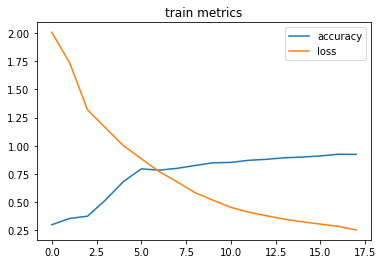

In [35]:
plt.plot(hist_.history['accuracy'])
plt.plot(hist_.history['loss'])
plt.title('train metrics')
plt.legend(['accuracy', 'loss'])

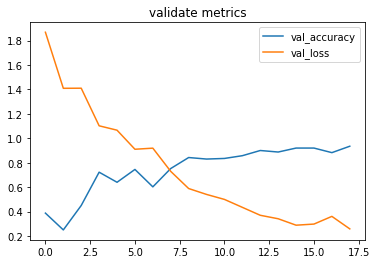

In [36]:
plt.plot(hist_.history['val_accuracy'])
plt.plot(hist_.history['val_loss'])
plt.title('validate metrics')
plt.legend(['val_accuracy', 'val_loss'])

# Сверточная

In [37]:
model_conv_2 = Sequential()
model_conv_2.add(Conv2D(8, kernel_size=(3, 3), 
                strides=(1,1),
                activation='relu',
                input_shape=input_shape))
model_conv_2.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
model_conv_2.add(Conv2D(16, kernel_size=(3, 3), 
                strides=(1,1),
                activation='relu',
                input_shape=input_shape))
model_conv_2.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
model_conv_2.add(Flatten())
model_conv_2.add(Dense(classes, activation='softmax'))

model_conv_2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model_conv_2.summary()
hist = model_conv_2.fit(x_train_norm, y_train_,
          batch_size=batch_size,
          epochs=25,
          verbose=1,
          validation_data=(x_test_norm, y_test_))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 8)         224       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 1604      
Total params: 2,996
Trainable params: 2,996
Non-trainable params: 0
____________________________________________________

In [38]:
score = model_conv_2.evaluate(x_test_norm, y_test_, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09039312398992479
Test accuracy: 0.9800000190734863


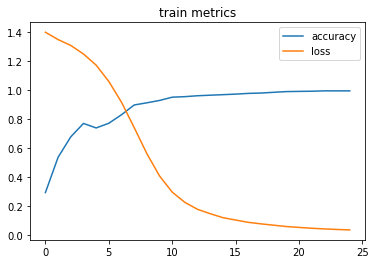

In [39]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.title('train metrics')
plt.legend(['accuracy', 'loss'])

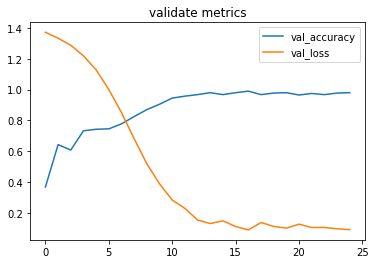

In [40]:
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['val_loss'])
plt.title('validate metrics')
plt.legend(['val_accuracy', 'val_loss'])